<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprrint_3_Joes_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

#Libraries

In [1]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics
from sklearn import preprocessing 

# Data

In [2]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


We need a seperate dataframe of just hte date column ( to JOIN to the scaled data. One cannot scale DATES ( we could convert ht dates to numeric but this will get the job done too))

In [3]:
date_column = data[['date']]
date_column.head()

,date
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01


Now we move the date column back to index position

In [4]:
data.set_index('date',inplace=True) 
data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460

Now we scale the data.

We might if Time allows try multiple versions of scaling but we will begine with the ***L2*** version which the prof on one of his slides seemed to indicate was the standard

In a acomplet e lack of confidenc or I will start a new dataset to isolate this one 

In [5]:
L2_data = data
L2_data.head(1)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.02,502084.833,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.0,460632.0,5702443.0,4657354.0,7012296.0,3283417.0,549789.0,1454672.0,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.329,1093819.181,1,5,25


In [6]:
L2_data_scaled = preprocessing.normalize(L2_data, axis=0, norm='l2')

In [ ]:
# L2_data_scaled. #Scaling returns a Numpy array NOT a DF
#                 so ther eis not "head() function"

But we can restore this array to a nice orderly pandas df with col headings.

In [7]:
#restore scaled data matrisx to DF and apply headings
L2_data_scaledL2 = pd.DataFrame(L2_data_scaled, columns = L2_data.columns)

In [8]:
L2_data_scaledL2.head(10)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,0.156337,...,0.095960,0.135482,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648
1,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118325,0.146551,...,0.141723,0.167819,0.129972,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942
2,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114219,0.140825,...,0.088908,0.132430,0.103062,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354
3,-0.289109,-0.324624,0.111840,0.121269,0.124850,0.106973,0.129308,0.115817,0.125976,0.126702,0.121463,0.128126,0.119217,0.127088,0.093568,0.195590,0.151301,0.132767,0.186339,0.119106,0.112837,0.121317,0.132391,-0.100605,-0.124503,-0.067951,0.098427,0.114962,0.137994,0.134584,0.094665,0.111585,0.071528,0.116148,0.151499,0.125595,0.074393,0.09394

Bummer about the date column .  but we can JOIN ***L2_data_scaledL2*** with the df of just the date we meade up top

In [9]:
data_scaled_dated = pd.concat([date_column,  L2_data_scaledL2] , axis = 1, join ='outer')
 
data_scaled_dated.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.095960,0.135482,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118325,...,0.141723,0.167819,0.129972,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114219,...,0.088908,0.132430,0.103062,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354


Now we will add columns related to date: Year, month, Month_Year

First step is to convert "date" to date time

In [10]:
data_scaled_dated['date'] = pd.to_datetime(data_scaled_dated['date'])

Now let us strip out year from Date_2


In [11]:
# add a column for Year
data_scaled_dated['Year'] = data_scaled_dated['date'].dt.year

Next extract the Month 

In [12]:
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month
data_scaled_dated['month'] =pd.DatetimeIndex(data_scaled_dated['date']).month

In [13]:
data_scaled_dated.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118325,...,0.129972,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942,2017,2
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114219,...,0.103062,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354,2017,3
3,2017-04-01,-0.289109,-0.324624,0.111840,0.121269,0.124850,0.106973,0.129308,0.115817,0.125976,0.126702,0.121463,0.128126,0.119217,0.127088,0.093568,0.195590,0.151301,0.132767,0.186339,0.119106,0.112837,0.121317,0.132391,-0.100605,-0.124503,-0.067951,0.098427,0.114962,0.137994,0.134584,0.094665,0.111585,0.071528,0.116148,0.151499,0.125595,0.074393,0.093948,0.112430,...,0.127510,0.262288,0.124595,0.092785,0.115253,0.111566,0.0

Now create a col for Month_Year

In [14]:
data_scaled_dated['Year_Month'] = data_scaled_dated['date'].dt.strftime('%Y-%m')


In [15]:
data_scaled_dated.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month,Year_Month
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1,2017-01
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118325,...,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942,2017,2,2017-02
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114219,...,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354,2017,3,2017-03
3,2017-04-01,-0.289109,-0.324624,0.111840,0.121269,0.124850,0.106973,0.129308,0.115817,0.125976,0.126702,0.121463,0.128126,0.119217,0.127088,0.093568,0.195590,0.151301,0.132767,0.186339,0.119106,0.112837,0.121317,0.132391,-0.100605,-0.124503,-0.067951,0.098427,0.114962,0.137994,0.134584,0.094665,0.111585,0.071528,0.116148,0.151499,0.125595,0.074393,0.093948,0.112430,...,0.262288,0.124595,0.092785,0.115253,0.111566,0.089114,0.131320,0.1

In [ ]:
#data_scaled_dated

  Here is barplot of each month's quatiton sold

In [ ]:
plt.figure(figsize=(5,20))
sns.barplot( x= 'Quantity', y= 'Year_Month', data = data_scaled_dated,orient='h')

Next we will add a new column that has 0's for every month except April 2020.  

Barplot comparing Quantity

While other months were impacted by covid only April 2020 was without precedent.



We will create a new column entitled "covid" and fill it with zeros except at April 2020 wher ewe will place a "1" there.

Add a dummy variable for covid . 0 = no , 1 = yes, .

I am eyeballing this.  Is Neg o.4 the number that we want?

In [17]:
data_scaled_dated['covid'] = np.where(data_scaled_dated['Quantity']< -0.4, '1', '0')
data_scaled_dated.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month,Year_Month,covid
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1,2017-01,0
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118325,...,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942,2017,2,2017-02,0
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114219,...,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354,2017,3,2017-03,0


In [27]:
data_scaled_dated.head(1)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month,Year_Month,covid
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.12526,0.121865,0.112554,0.20787,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.11495,0.150023,0.190661,0.119756,0.119991,...,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1,2017-01,0


# Correlation

## Manual correlation looking for features

In [31]:
data_scaled_dated_dates_removed = data_scaled_dated.drop(['Year_Month' , 'month','Year'],axis= 1)


In [32]:
data_scaled_dated_dates_removed.head(1)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.12526,0.121865,0.112554,0.20787,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187056,0.090462,0.111242,0.064448,0.109396,0.11495,0.150023,0.190661,0.119756,0.119991,...,0.135482,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,0


In [49]:
#corr = total.corr()['Quantity'].sort_values(ascending=False)
corr = data_scaled_dated.corr()['Quantity'].sort_values(ascending=False)

In [39]:
corr

Quantity                           1.000000
Gray_cement_dispatch_comercial     0.763691
Gray_cement_dispatch_other         0.749478
Gray_cement_dispatch               0.742108
Gray_cement_prod                   0.711097
                                     ...   
Construction_lic_unt_NO_SIlag_4   -0.453457
Construction_lic_arealag_4        -0.473548
Imports_quantitylag_4             -0.475870
Construction_lic_untlag_4         -0.480974
holiday                           -0.609440
Name: Quantity, Length: 944, dtype: float64

Converthe output to a data frame

In [44]:
corr.head(3)

Quantity                          1.000000
Gray_cement_dispatch_comercial    0.763691
Gray_cement_dispatch_other        0.749478
Name: Quantity, dtype: float64

In [45]:
corr.head()

Quantity                          1.000000
Gray_cement_dispatch_comercial    0.763691
Gray_cement_dispatch_other        0.749478
Gray_cement_dispatch              0.742108
Gray_cement_prod                  0.711097
Name: Quantity, dtype: float64

change the index from Quantity

In [57]:
corr_df = pd.DataFrame(corr)

In [58]:
corr_df.head(2)

,Quantity
Quantity,1.000000
Gray_cement_dispatch_comercial,0.763691


In [62]:
#df.reset_index(inplace = True, drop = True)
corr_df = corr_df.reset_index(inplace = False, drop = False)

In [63]:
corr_df.head(2)

,index,Quantity
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691


Not precisely what we want  but easy to fix

In [64]:
corr_df.columns = ['Feature' , 'Correlation']
corr.head(2)

Quantity                          1.000000
Gray_cement_dispatch_comercial    0.763691
Name: Quantity, dtype: float64

In [65]:
corr_df.head(2)

,Feature,Correlation
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691


make a line achrt of coor scores no lables


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


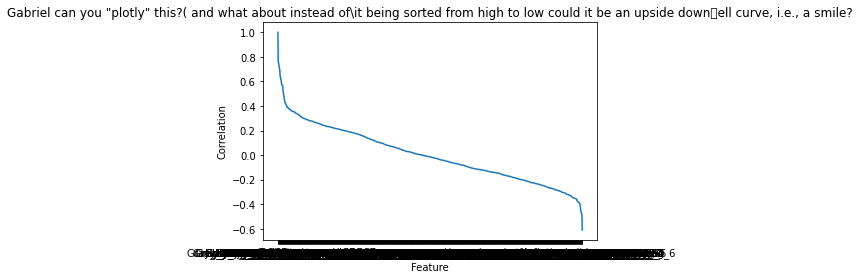

In [73]:
sns.lineplot('Feature', 'Correlation' ,data = corr_df).set_title('Gabriel can you "plotly" this?( and what about instead of\it being sorted from high to low could it be an upside down\bell curve, i.e., a smile?')
sns.subtitle('And what about instead of\it being sorted from high to low could it be an upside down\bell curve, i.e., a smile?')
plt.show()

In [51]:
#top_40 = data_scaled_dated.corrwith(data_scaled_dated['Quantity']).sort_values(ascending=False)

In [52]:
#top_40

Quantity                           1.000000
Gray_cement_dispatch_comercial     0.763691
Gray_cement_dispatch_other         0.749478
Gray_cement_dispatch               0.742108
Gray_cement_prod                   0.711097
                                     ...   
Construction_lic_unt_NO_SIlag_4   -0.453457
Construction_lic_arealag_4        -0.473548
Imports_quantitylag_4             -0.475870
Construction_lic_untlag_4         -0.480974
holiday                           -0.609440
Length: 944, dtype: float64

In [36]:
# From Stack Overflow:https://stackoverflow.com/questions/34896455/how-to-do-pearson-correlation-of-selected-columns-of-a-panda

#data.corrwith(data['Quantity']).sort_values(ascending=False)

x = data_scaled_dated.corrwith(data_scaled_dated['Quantity']).sort_values(ascending=False)

In [19]:
raw_corr.reindex(["feature","correlation"])

NameError: ignored

In [46]:
raw_corr

,0
Quantity,1.000000
Gray_cement_dispatch_comercial,0.763691
Gray_cement_dispatch_other,0.749478
Gray_cement_dispatch,0.742108
Gray_cement_prod,0.711097
...,...
Construction_lic_unt_NO_SIlag_4,-0.453457
Construction_lic_arealag_4,-0.473548
Imports_quantitylag_4,-0.475870
Construction_lic_untlag_4,-0.480974


Automated Feature selection has me stumped.  Two things I am not sure PCA is a the right choice for Supervised but the big problem I am having is knowing what features have been selected.

# Automated Feature Selection

Her is one from this guy who we were supposed to rad this week on automated feature selection.  I will work on applying this anssee if I acn get it to work

https://machinelearningmastery.com/feature-selection-for-regression-data/

 ## PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

And voila' we have a scaled pandas data frame.  Now we need to identify the most importan features.

In [17]:
#scaled_data_PCA = data_scaled
#L2_data_scaledL2
# I should not have re-attached the date col yet

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components= 5)

In [24]:
principalComponents = pca.fit_transform(L2_data_scaledL2)

In [ ]:
principalComponents

In [25]:
pd.DataFrame(coef, columns=['PC-1', 'PC-2'], index=df.columns)

NameError: ignored